# Keras ile CIFAR10 üzerinde Resim sınıflandırma

Kütüphaneleri yüklüyoruz

In [6]:
from __future__ import print_function

import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
from keras.utils import np_utils
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import helper
if K.backend()=='tensorflow':
            K.set_image_dim_ordering("th")

Veri Setimizi yüklüyoruz

In [7]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

Modelimizi yazıyoruz

In [10]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, 32, 32)
else:
    input_shape = (32, 32, 3)
            

In [11]:
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        

        model.add(Flatten())

        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.5))
        

        model.add(Dense(10, activation='softmax'))

Modelimizi ayağa kaldırıyoruz

In [12]:
model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])

eğitim

In [13]:
baslangic = time.time()

history=model.fit(X_train, Y_train, epochs=2, batch_size=128)

son = time.time()
print ("Model %0.2f saniyede eğitildi"%(son - baslangic))

Epoch 1/2
50000/50000 [==============================] - 1126s - loss: 1.9766 - acc: 0.2615  
Epoch 2/2
50000/50000 [==============================] - 1152s - loss: 1.6396 - acc: 0.3918  
Model 2280.68 saniyede eğitildi


Ağın değerlendirilmesi kendi test verisiyle

In [14]:
scores = model.evaluate(X_test,Y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 118s   
Loss: 1.494
Accuracy: 0.463


Modelimizin Özeti

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 30, 30)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 28, 28)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 14, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 14, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 12, 12)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 6, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 4, 4)         147584    
__________

TEST Bölümü

Dışardaki verilerden test

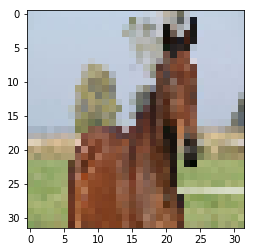

1/1 [==============================] - 0s
Tahmin: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Tahmin sınıfı: [9]
0.jpg


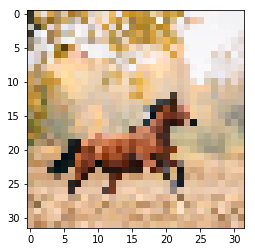

1/1 [==============================] - 0s
Tahmin: [[ 0.          0.03027904  0.          0.          0.          0.          0.
   0.          0.          0.96972096]]
Tahmin sınıfı: [9]
1.jpg


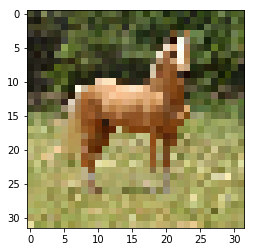

1/1 [==============================] - 0s
Tahmin: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
Tahmin sınıfı: [7]
2.jpg


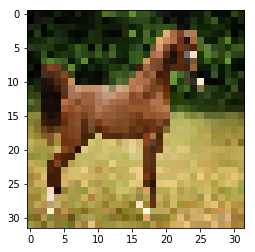

1/1 [==============================] - 0s
Tahmin: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
Tahmin sınıfı: [7]
3.jpg


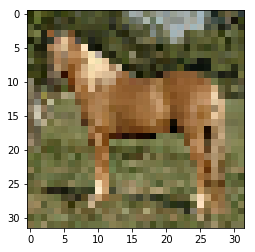

1/1 [==============================] - 0s
Tahmin: [[  0.00000000e+00   9.99995351e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   3.13898077e-13
    0.00000000e+00   4.60873798e-06]]
Tahmin sınıfı: [1]
4.jpg


In [17]:
import os
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from matplotlib import pyplot as plt

sinif_isimleri = ['ucak','otomobil','kus','kedi','geyik',
                       'kopek','kurbağa','at','gemi','kamyon']
klasor = "./test/at"
dosya=os.listdir(klasor)
for i in dosya:
    
    img_path = klasor+'/'+i
    img = image.load_img(img_path, target_size=(32, 32))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    plt.imshow(img)
    plt.show()
    
    preds = model.predict(x)
    pp=model.predict_classes(x)
    
    print('Tahmin:', preds)
    print('Tahmin sınıfı:', pp)
    
    print(i)

Test verisinde rastgele test

In [29]:
import random
from scipy.misc import toimage
from matplotlib import pyplot
rdn=10
for i in range(5):
    
    X=X_test[i]
    Y=Y_test[i]
    a=X.reshape(1,3,32,32)
    
    sonuc=model.predict(a)
    print("Tahmin")
    print(sonuc)
    
    sonuc1=model.predict_classes(a)
    print(sonuc1)
    print("Doğru Sonuc",Y)

Tahmin
[[ 0.02799332  0.03058589  0.09980895  0.30908805  0.0392944   0.15839516
   0.23580605  0.01989911  0.03462018  0.04450895]]
1/1 [==============================] - 0s
[3]
Doğru Sonuc [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
Tahmin
[[  8.65840390e-02   3.59010100e-01   2.16958695e-03   2.72364705e-04
    1.26339961e-03   6.69581786e-05   5.00892813e-04   2.36156848e-04
    4.69944775e-01   7.99517557e-02]]
1/1 [==============================] - 0s
[8]
Doğru Sonuc [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Tahmin
[[ 0.14686465  0.34773222  0.03066079  0.01083875  0.01296975  0.00449621
   0.00635987  0.00801736  0.2814295   0.15063091]]
1/1 [==============================] - 0s
[1]
Doğru Sonuc [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Tahmin
[[  1.36055663e-01   2.67713845e-01   8.37089401e-03   1.45094399e-03
    3.79779027e-03   4.34458314e-04   1.35320460e-03   9.55371361e-04
    4.78856117e-01   1.01011731e-01]]
1/1 [==============================] - 0s
[8]
Doğru Sonuc [ 1.  

Uygulanan filtreler

(1, 1, 32, 30, 30)
(32, 30, 30)
(30, 30, 32)


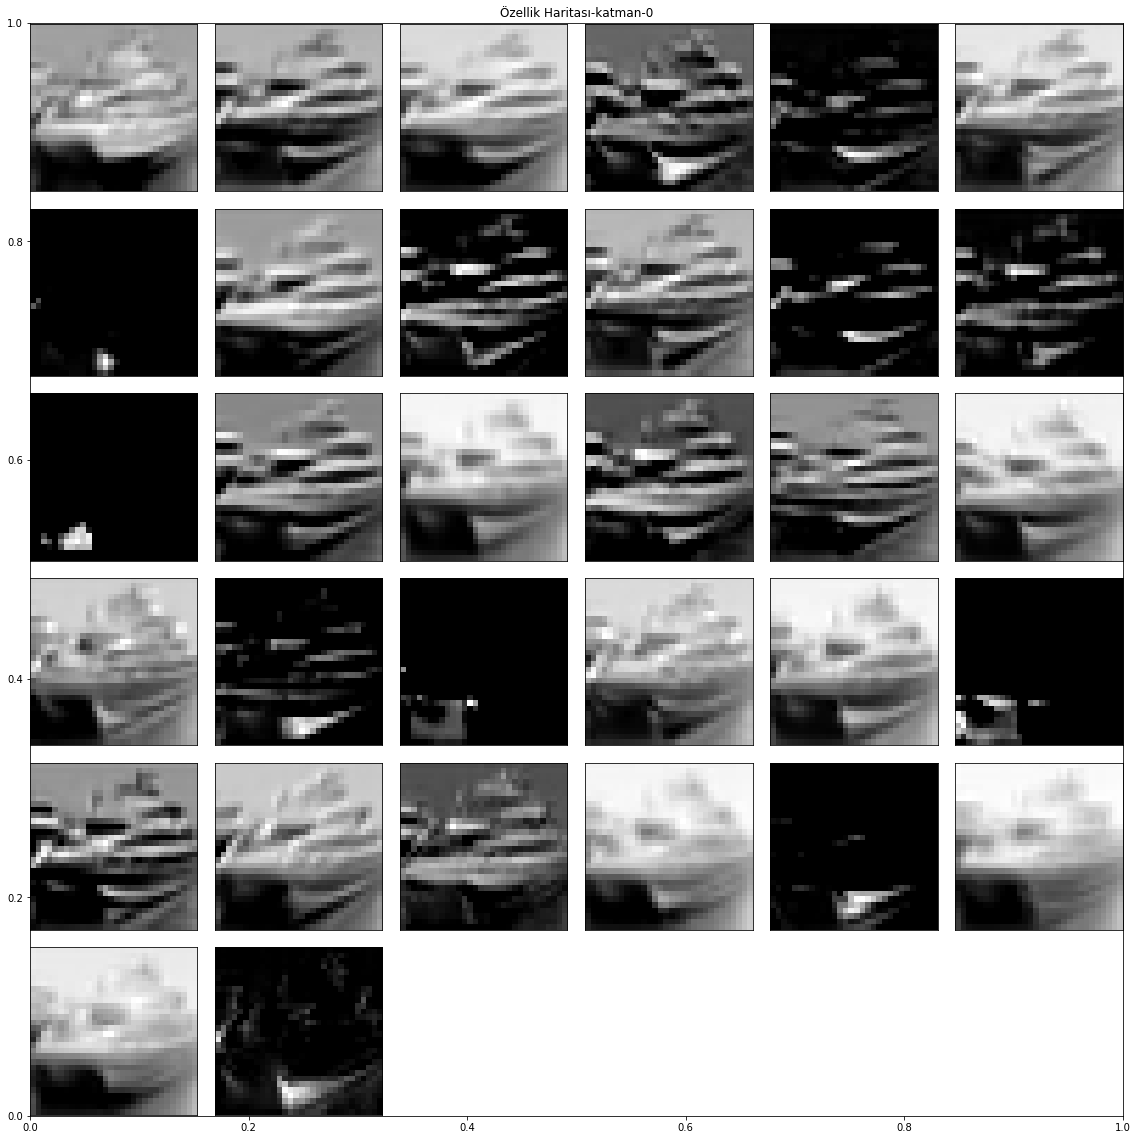

In [19]:
import helper
test_image=X_test[1]
a=test_image.reshape(1,3,32,32)
helper.filtre_goster(model,1,a)

Modelin yapısı ve ayarlar

In [28]:
model.get_config()
a=model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
model.layers[0].trainable
print(a)

{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 3, 32, 32), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_first', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


Modelli kaydetmek

In [ ]:
from keras.models import model_from_json
from keras.models import load_model
##model tamamı 
model_json = model.to_json()
with open("saved_modeller/basit.json", "w") as json_file:
    json_file.write(model_json)
#sadece ağırlıklar    
model.save_weights("saved_modeller/basit_agirlik.h5")


## tamamının Yüklenmesi
json_file = open('saved_modeller/basit.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
##sadece ağırlıkların yüklenmesi
loaded_model.load_weights("saved_modeller/basit_agirlik.h5")

##modelin tamaamı
model.save('saved_modeller/basit.h5')
loaded_model=load_model('saved_modeller/basit.h5')